In [1]:
pip install yfinance --user

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

google = yf.Ticker("GOOG")

In [3]:
df = google.history(period='1d', interval="1m")
print(df.head())

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-05-02 09:30:00-04:00  166.589996  167.000000  166.229996  166.339996   
2024-05-02 09:31:00-04:00  166.279999  166.520004  165.949997  165.949997   
2024-05-02 09:32:00-04:00  165.960007  166.089996  165.830002  165.860001   
2024-05-02 09:33:00-04:00  165.854294  166.770004  165.690002  166.389999   
2024-05-02 09:34:00-04:00  166.364304  166.770004  166.229996  166.270004   

                           Volume  Dividends  Stock Splits  
Datetime                                                    
2024-05-02 09:30:00-04:00  668110        0.0           0.0  
2024-05-02 09:31:00-04:00  134497        0.0           0.0  
2024-05-02 09:32:00-04:00   94659        0.0           0.0  
2024-05-02 09:33:00-04:00  122151        0.0           0.0  
2024-05-02 09:34:00-04:00   90032        0.0           0.0  


In [4]:
df = google.history(period='1d', interval="1m")
df = df[['Low']]
df.head()

,Low
Datetime,
2024-05-02 09:30:00-04:00,166.229996
2024-05-02 09:31:00-04:00,165.949997
2024-05-02 09:32:00-04:00,165.830002
2024-05-02 09:33:00-04:00,165.690002
2024-05-02 09:34:00-04:00,166.229996


In [5]:
df['date'] = pd.to_datetime(df.index).time
df.set_index('date', inplace=True)
df.head()

,Low
date,
09:30:00,166.229996
09:31:00,165.949997
09:32:00,165.830002
09:33:00,165.690002
09:34:00,166.229996


In [6]:
X = df.index.values
y = df['Low'].values
# The split point is the 10% of the dataframe length
offset = int(0.10*len(df))
X_train = X[:-offset]
y_train = y[:-offset]
X_test  = X[-offset:]
y_test  = y[-offset:]

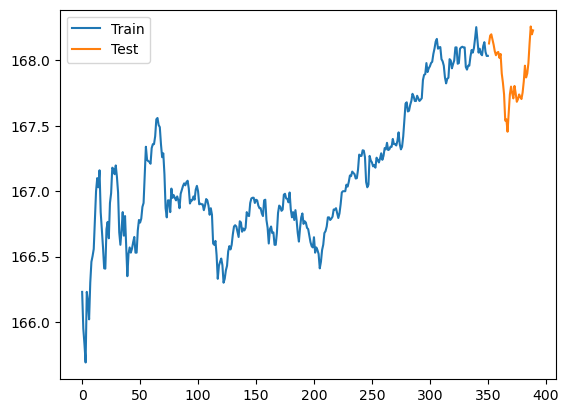

In [7]:
plt.plot(range(0,len(y_train)),y_train, label='Train')
plt.plot(range(len(y_train),len(y)),y_test,label='Test')
plt.legend()
plt.show()

In [11]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression

def load_data():
    # This is just an example; replace it with actual code to load your data
    X = [[1, 2], [3, 4], [5, 6]]
    y = [0, 1, 0]
    return X, y

# Load your data
X, y = load_data()

# Create a logistic regression model
model = LogisticRegression()

# Fit the model
with warnings.catch_warnings():
    warnings.filterwarnings("error", category=ConvergenceWarning)
    try:
        model.fit(X, y)
    except ConvergenceWarning:
        print("ConvergenceWarning: Maximum number of iterations exceeded")

# Evaluate the model
score = model.score(X, y)
print("Model score:", score)


Model score: 0.6666666666666666


In [14]:
print(f'Real data for time 0: {y_train[len(y_train)-1]}')
print(f'Real data for time 1: {y_test[0]}')
print(f'Pred data for time 1: {forecast}')

Real data for time 0: 168.03500366210938
Real data for time 1: 168.1300048828125


NameError: name 'forecast' is not defined